In [3]:
from nilearn import plotting
from nilearn.image import resample_img, mean_img,smooth_img
from nilearn import datasets
from nilearn.regions import RegionExtractor
from nilearn import image
import nibabel as nib
from nipype.interfaces import fsl
from nipype.interfaces.ants import N4BiasFieldCorrection, RegistrationSynQuick
from lib.zscore_norm import zscore_normalize
import numpy as np


atlas_folder = "/data/haoyuezhang/data/vascular_territory_template/"
data_test_folder = '/data/haoyuezhang/data/vascular_territory_template/testcase/'
atl = atlas_folder+'mni_vascular_territories.nii.gz'


In [4]:
mni_terr = nib.load(atl)
print(mni_terr.shape)

(182, 218, 182)


In [5]:
test_img_1 = nib.load(data_test_folder+'PWI_r.nii.gz')
print(test_img_1.shape)

(224, 224, 26, 90)


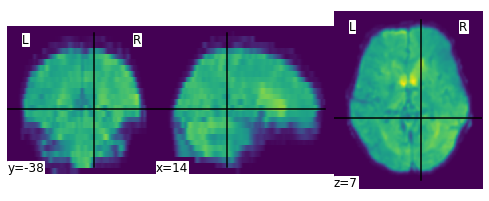

In [10]:
smooth_anat_img = smooth_img(test_img_1,fwhm=3)
plotting.plot_img(smooth_anat_img.slicer[:,:,:,50])

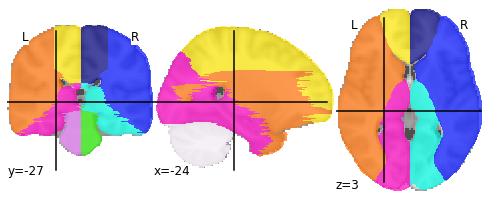

In [11]:
plotting.plot_roi(mni_terr)

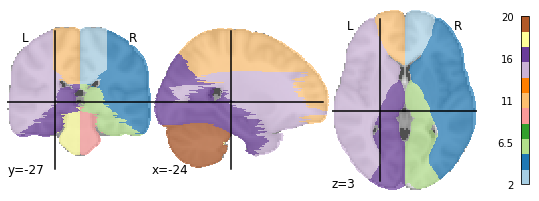

In [13]:
plotting.plot_roi(mni_terr, colorbar=True, cmap='Paired')

In [68]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
msdl = nib.load(atlas_filename)
msdl.shape

c:\users\harry\anaconda3\envs\stroke_preprocessing\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


(40, 48, 35, 39)

In [16]:
plotting.plot_stat_map(image.index_img(atlas_filename, 5),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

NameError: name 'atlas_filename' is not defined

In [19]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels
ho = nib.load(atlas_filename)
ho.shape

(91, 109, 91)

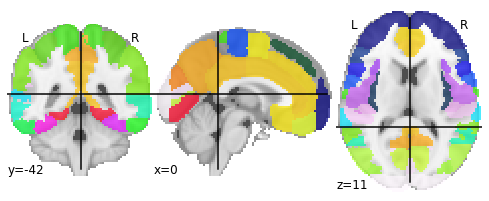

In [20]:
plotting.plot_roi(ho)

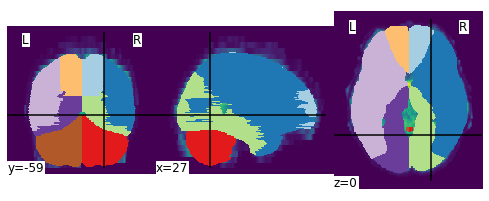

In [44]:
display = plotting.plot_img(test_img_1.slicer[:,:,:,50])
display.add_overlay(mni_terr,cmap='Paired')
plotting.show()

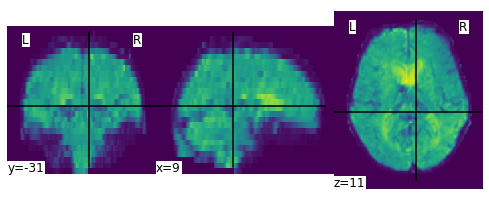

In [22]:
plotting.plot_img(test_img_1.slicer[:,:,:,25])

In [53]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=mni_terr, standardize=True)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(test_img_1)

atlas_region_coords = plotting.find_parcellation_cut_coords(mni_terr) 

In [72]:
atlas_region_coords = plotting.find_parcellation_cut_coords(mni_terr) 

In [80]:
atlas_region_coords[1:,:].shape

(10, 3)

In [54]:
time_series.shape

(90, 10)

In [28]:
test_img_1.shape

(224, 224, 26, 90)

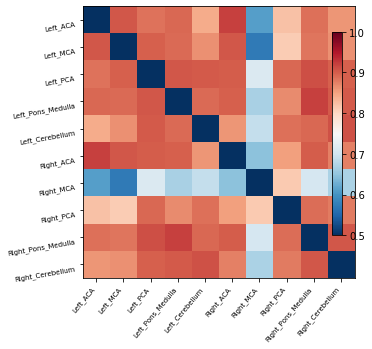

In [106]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=label_terr, colorbar=True,
                     vmax=1, vmin=0.5)

In [58]:
correlation_matrix

array([[0.        , 0.90444795, 0.88524154, 0.89371345, 0.84196904,
        0.92082111, 0.61302427, 0.82295529, 0.88756726, 0.86017773],
       [0.90444795, 0.        , 0.89858528, 0.89233954, 0.86421526,
        0.90448134, 0.57399185, 0.81381188, 0.88386642, 0.86522251],
       [0.88524154, 0.89858528, 0.        , 0.90445527, 0.90363764,
        0.90075035, 0.71295148, 0.89403155, 0.91058334, 0.89906916],
       [0.89371345, 0.89233954, 0.90445527, 0.        , 0.8923815 ,
        0.90028869, 0.66839905, 0.86773057, 0.9200186 , 0.90408084],
       [0.84196904, 0.86421526, 0.90363764, 0.8923815 , 0.        ,
        0.86045165, 0.69057369, 0.88747406, 0.89438836, 0.90843169],
       [0.92082111, 0.90448134, 0.90075035, 0.90028869, 0.86045165,
        0.        , 0.64838696, 0.85174639, 0.90117006, 0.87654687],
       [0.61302427, 0.57399185, 0.71295148, 0.66839905, 0.69057369,
        0.64838696, 0.        , 0.81458425, 0.70718597, 0.67052305],
       [0.82295529, 0.81381188, 0.8940315

In [45]:
label_terr = ['Left_ACA',
                  'Left_MCA', 
                  'Left_PCA',
                  'Left_Pons_Medulla',
                  'Left_Cerebellum',
                  'Right_ACA',
                  'Right_MCA', 
                  'Right_PCA',
                  'Right_Pons_Medulla',
                  'Right_Cerebellum',
]

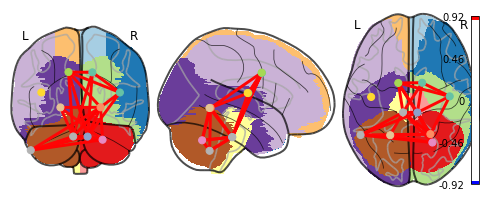

In [107]:
display=plotting.plot_connectome(correlation_matrix, atlas_region_coords[:10,:],
                         edge_threshold="50%", colorbar=True)
display.add_overlay(mni_terr,cmap='Paired')
plotting.show()

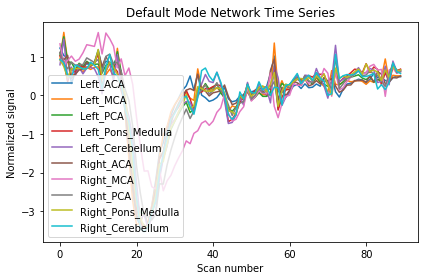

In [91]:
import matplotlib.pyplot as plt

for time_serie, label in zip(time_series.T, label_terr):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

In [ ]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

# Load the functional datasets
data = datasets.fetch_development_fmri(n_subjects=1)

print('First subject resting-state nifti image (4D) is located at: %s' %
      data.func[0])

from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(data.func[0],
                                   confounds=data.confounds)
